In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)
import pandas as pd
import numpy as np
import cx_Oracle
from sqlalchemy import types, create_engine
import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from sklearn.model_selection import cross_val_score
import os
os.chdir(r"C:\Users\aman.khatri91425\Desktop\HomeCredit\UW\RGS")
seed = 5

In [8]:
connection = cx_Oracle.connect('HCIN_ISHANDIXIT202158[AP_UWI]/cR5ZKJXbL3rJ@incl02.in.prod/HWIN_USR_DEV.HOMECREDIT.IN')
curs = connection.cursor()

# query = """
# with uw_base as 
# (
# select SKP_CREDIT_CASE, client_exi_3m , TIME_DECISION_DATE, PRODUCT_GOODS_TYPE,PRODUCT_CREDIT_TYPE,AMT_CREDIT, 
# CLIENT_EMI, FLAG_1PCT_PHANTOM, pos_gspn_v2, score_cb, pos_type, 
# case when 
# client_exi_3m = 'N' then SCORE_APSC_NOV18 else SCORE_FEB19_WITH_CIBIL end  as RISK_SCORE,DECISION_OVERALL, 
# RISK_FPD30, RISK_FSTQPD30, RISK_FSTQPD60  from ap_uwi.uw_daily_data_all
# where  TIME_CREATION_DATE between to_date('01-05-19','dd-mm-yy') and to_date('31-12-19','dd-mm-yy') 
# and PRODUCT_GROUP = 'CD'
# ),

# geo_base as 
# (
# select a.skp_credit_case, date_decision, skp_client,
# nvl(COMBINED_SCORE_KNN_EXI,0.05909955379812824) COMBINED_SCORE_KNN_EXI,
# nvl(COMBINED_SCORE_KNN_NTC,0.08894919166065231) COMBINED_SCORE_KNN_NTC
# from
# ap_bi.bd_geo a
# left join
# bd_grid_score_hist b
# on a.grid_id = b.grid_id
# and trunc(a.date_decision,'mon')=b.month
# where date_decision between to_date('01-05-19','dd-mm-yy') and to_date('31-12-19','dd-mm-yy') 
# ),

# salary_base as
# (
# select skp_credit_case, acc0_eom_av_balance, calculated_salary,  
# case when (nvl2(OTHER_INCOME_M1,1,0)+nvl2(OTHER_INCOME_M2,1,0)+nvl2(OTHER_INCOME_M3,1,0)) = 0 then null else 
# round((nvl(OTHER_INCOME_M1,0)+nvl(OTHER_INCOME_M2,0)+
# nvl(OTHER_INCOME_M3,0))/(nvl2(OTHER_INCOME_M1,1,0)+nvl2(OTHER_INCOME_M2,1,0)+nvl2(OTHER_INCOME_M3,1,0)),0) end as other_income_avg
# from bd_sdk_data_new
# where all_sms_cnt >2
# and SMS_DATA_NULL_REASON = 6
# ), 

# active_debt as 
# (
# select a.skp_credit_case,
# sum(case when add_months(loan_start_date_e,repay_tenure_e) < date_decision then amt_emi_e else 0 end) active_emi
# from AP_UWI.BD_CIBIL_ACCOUNT_ESTIMATE a
# where date_decision between to_date('01-05-19','dd-mm-yy') and to_date('31-12-19','dd-mm-yy')
# and a.skp_credit_case <> -2
# group by a.skp_credit_case 
# )

# select a.*, COMBINED_SCORE_KNN_EXI,COMBINED_SCORE_KNN_NTC, acc0_eom_av_balance, calculated_salary, other_income_avg,
# (case when segment_id in ('PRUDENT FINANCIAL PLANNER', 'LOYALISTS', 'YOUNG ASPIRANTS','RESPONSIBLES') then 'Desirable'
# when segment_id in ('YOUNG MIGRATORS','SEASONED BORROWER','HINDI SPEAKING BELT') then 'Goodtohave'
# when segment_id in ('FAMILY MAN','SUPPORTING HOUSEWIVES','RISK CUSTOMERS') then 'undesirable'
# else 'Others' end) as Segment_category, active_emi
# from uw_base  a 
# left join geo_base b 
# on a.skp_credit_case = b.skp_credit_case 
# left join salary_base c 
# on a.skp_credit_case = c.skp_credit_case
# left join T_SEGMENT_UNSUPERVISED seg on a.skp_credit_case = seg.skp_credit_case
# left join active_debt d
# on a.skp_credit_case = d.skp_credit_case
# where risk_score is not null 
# order by a.skp_credit_case asc"""
    

# # data = pd.DataFrame()
# # size = 1000000
# # curs.arraysize = size
# # # start = time.time()
# # data = (data.append([i for i in curs.execute(sql)]))
# # # print(time.time()-start)


# df = pd.read_sql(query,connection)
# df.to_pickle(os.getcwd()+r"\Data Files\loan_performance_dump.pkl")

In [2]:
df = pd.read_pickle(os.getcwd()+r"\Data Files\loan_performance_dump.pkl")

In [3]:
df.head()

,SKP_CREDIT_CASE,CLIENT_EXI_3M,TIME_DECISION_DATE,PRODUCT_GOODS_TYPE,PRODUCT_CREDIT_TYPE,AMT_CREDIT,CLIENT_EMI,FLAG_1PCT_PHANTOM,POS_GSPN_V2,SCORE_CB,...,RISK_FPD30,RISK_FSTQPD30,RISK_FSTQPD60,COMBINED_SCORE_KNN_EXI,COMBINED_SCORE_KNN_NTC,ACC0_EOM_AV_BALANCE,CALCULATED_SALARY,OTHER_INCOME_AVG,SEGMENT_CATEGORY,ACTIVE_EMI
0,234407115,N,01-05-19,c_Mob_Tab,2X0,14990.0,2499,0,1.0,-1.0,...,0,0,0,0.059100,0.088949,NaN,NaN,NaN,undesirable,1435.0
1,234407117,N,01-05-19,e_HA,ZERO,16266.0,1356,0,2.0,-1.0,...,0,0,0,0.060829,0.093979,NaN,NaN,NaN,undesirable,NaN
2,234407119,N,01-05-19,c_Mob_Tab,ZERO,8893.0,1589,0,2.0,-1.0,...,0,0,0,0.042732,0.070343,NaN,NaN,NaN,Goodtohave,NaN
3,234407125,N,01-05-19,c_Mob_Tab,ZERO,8461.0,1596,0,1.0,-1.0,...,0,0,0,0.037978,0.059594,NaN,NaN,NaN,Goodtohave,NaN
4,234407126,N,01-05-19,c_Mob_Tab,STANDARD,12589.0,1535,0,2.0,-1.0,...,0,0,0,0.059100,0.088949,NaN,NaN,NaN,Goodtohave,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SKP_CREDIT_CASE,4441052.0,2.614637e+08,1.972980e+07,2.344071e+08,2.420575e+08,2.513924e+08,2.801607e+08,2.895320e+08
AMT_CREDIT,4441052.0,1.125054e+04,5.206308e+03,1.000000e+03,8.189000e+03,9.849000e+03,1.278900e+04,1.000000e+05
CLIENT_EMI,4441052.0,1.892735e+03,7.499688e+02,1.000000e+02,1.430000e+03,1.714000e+03,2.170000e+03,1.727700e+04
FLAG_1PCT_PHANTOM,4441052.0,1.124824e-02,1.054595e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
POS_GSPN_V2,4263695.0,1.809454e+00,6.627051e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.700000e+01
SCORE_CB,4340741.0,3.343148e+02,3.476314e+02,-1.000000e+00,-1.000000e+00,2.000000e+00,7.090000e+02,9.000000e+02
RISK_SCORE,4441052.0,2.047394e-02,2.497997e-02,2.792293e-04,8.300570e-03,1.372056e-02,2.345828e-02,8.658747e-01
RISK_FPD30,4441052.0,7.846339e-03,8.823138e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
RISK_FSTQPD30,4441052.0,3.675053e-02,1.881487e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
RISK_FSTQPD60,4441052.0,2.725998e-02,1.628400e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441052 entries, 0 to 4441051
Data columns (total 23 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   SKP_CREDIT_CASE         int64         
 1   CLIENT_EXI_3M           object        
 2   TIME_DECISION_DATE      datetime64[ns]
 3   PRODUCT_GOODS_TYPE      object        
 4   PRODUCT_CREDIT_TYPE     object        
 5   AMT_CREDIT              float64       
 6   CLIENT_EMI              int64         
 7   FLAG_1PCT_PHANTOM       int64         
 8   POS_GSPN_V2             float64       
 9   SCORE_CB                float64       
 10  POS_TYPE                object        
 11  RISK_SCORE              float64       
 12  DECISION_OVERALL        object        
 13  RISK_FPD30              int64         
 14  RISK_FSTQPD30           int64         
 15  RISK_FSTQPD60           int64         
 16  COMBINED_SCORE_KNN_EXI  float64       
 17  COMBINED_SCORE_KNN_NTC  float64       
 18  AC

In [7]:
# # import pandas_profiling
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_file(outputfile='output.html')
# # df.profile_report()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text xticklabel objects>)

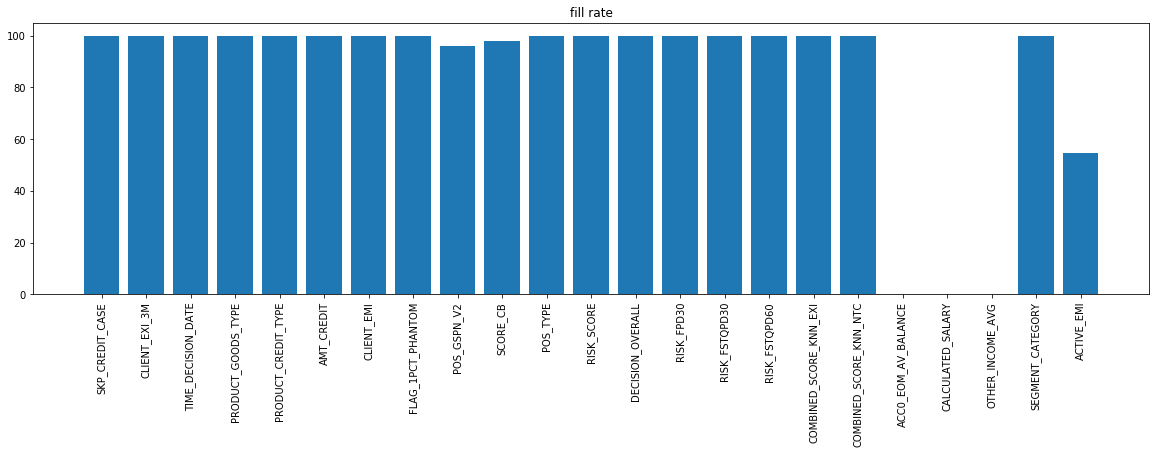

In [16]:
df_fill_rate = df.count()/len(df)*100
df_fill_rate  = df_fill_rate.reset_index()
df_fill_rate.columns = ["COLUMN","FILL_RATE"]
fig = plt.figure(figsize = (20,5))
ax1=fig.add_subplot(1,1,1)
ax1.bar(df_fill_rate.COLUMN, df_fill_rate.FILL_RATE)
plt.title("fill rate")
plt.xticks(rotation = 90)
# df_fill_rate.plot(x="COLUMN",y="FILL_RATE",kind = 'bar')

In [25]:
df.TIME_DECISION_DATE = pd.to_datetime(df.TIME_DECISION_DATE,format = '%d-%m-%y')

In [75]:
# data = data.loc[data.POS_GSPN_V2.isnull()==False]
data.dropna(inplace=True)
data.shape
# data.fillna(0,inplace=True)

(1047380, 8)

In [76]:
le_key = {}
for i in ['PRODUCT_CREDIT_TYPE','POS_GSPN_V2']: 
    le = LabelEncoder()
    fit = le.fit_transform(data[i])
    data[i] = fit
    le_key[i] = pd.DataFrame(le.classes_,list(range(len(le.classes_))))

# data[['PRODUCT_GOODS_TYPE','PRODUCT_CREDIT_TYPE','POS_GSPN']]=data[['PRODUCT_GOODS_TYPE','PRODUCT_CREDIT_TYPE','POS_GSPN']].apply(lambda x:LabelEncoder().fit_transform(x))

In [77]:
le_key

{'PRODUCT_CREDIT_TYPE':           0
 0       2X0
 1  STANDARD
 2      ZERO, 'POS_GSPN_V2':       0
 0   1.0
 1   2.0
 2   3.0
 3  17.0}

In [78]:
test = data.loc[(data.TIME_CREATION_DATE >= datetime.datetime(2020,1,1)) & ((data.DECISION_OVERALL.isin(['Rejected','Approved'])))]
test.drop('TIME_CREATION_DATE',axis=1,inplace=True)
data = data.loc[data.TIME_CREATION_DATE < datetime.datetime(2020,1,1)]
data.drop('TIME_CREATION_DATE',axis=1,inplace=True)
rejected_data = data.loc[(data.DECISION_OVERALL == 'Rejected')]
approved_data = data.loc[(data.DECISION_OVERALL == 'Approved')]
del data
# approved_data.drop('DECISION_OVERALL',axis=1,inplace=True)

In [79]:
approved_data.columns

Index(['PRODUCT_CREDIT_TYPE', 'AMT_CREDIT', 'POS_GSPN_V2', 'SCORE',
       'DECISION_OVERALL', 'RISK_AGRF30', 'RISK_FPD30'],
      dtype='object')

In [80]:
results = pd.DataFrame()
gini = cross_val_score(DecisionTreeClassifier(max_depth=5),approved_data[['SCORE']],approved_data.RISK_FPD30, cv = 3,scoring='roc_auc').mean()
for i in ['PRODUCT_CREDIT_TYPE', 'AMT_CREDIT', 'POS_GSPN_V2']:
    results.loc[i,'Marginal_gini_over_score'] = (cross_val_score(DecisionTreeClassifier(max_depth=5),approved_data[['SCORE',i]],approved_data.RISK_FPD30, cv = 3,scoring='roc_auc').mean()/gini-1)*100
    


In [81]:
sorted_features = list(results.sort_values(by='Marginal_gini_over_score',ascending=False).index)

In [82]:
include = []
for i in  range(len(sorted_features)):
    
    include.append(sorted_features[i])
    print(include)
    gini = cross_val_score(DecisionTreeClassifier(max_depth=5),approved_data[include+['SCORE']],approved_data.RISK_FPD30, cv = 3,scoring='roc_auc').mean()
    if i == 0:
        print(1)
        previous_gini = gini
    else:
        print(gini/previous_gini-1)
    if (gini/previous_gini-1)<0:
        include.pop(-1)
        previous_gini = previous_gini
    else:
        previous_gini = gini   
print(include)

['POS_GSPN_V2']
1
['POS_GSPN_V2', 'AMT_CREDIT']
-0.0010730845248740906
['POS_GSPN_V2', 'PRODUCT_CREDIT_TYPE']
0.00402794795184791
['POS_GSPN_V2', 'PRODUCT_CREDIT_TYPE']


In [83]:
from scipy.stats import ks_2samp, ttest_ind

In [84]:
features = ['PRODUCT_CREDIT_TYPE','AMT_CREDIT','POS_GSPN_V2'] 
numeric = ['AMT_CREDIT']
catagorical = ['PRODUCT_CREDIT_TYPE','POS_GSPN_V2']
base_feature = features[0]
create_rgs_feature = features[1]
add_rgs_features = features[2:]


#  code for base feature, if numeric bin it
if  approved_data[features[0]].dtype == float and len(pd.unique(approved_data[features[0]]))>100:
    approved_data[features[0]] = pd.qcut(approved_data[feature],np.linspace(0,1,11))
# approved_data.ACC_EXTRA_DP = approved_data.ACC_EXTRA_DP.astype('float') 
# rejected_data.ACC_EXTRA_DP = rejected_data.ACC_EXTRA_DP.astype('float') 

In [85]:
def similar_rows(table):
    if table.columns[1] in catagorical:
        for i in range(len(table)):
            locals()['df'+str(i)] = approved_data.loc[(approved_data[table.columns[0]]==table.iloc[i,0])&(approved_data[table.columns[1]]==table.iloc[i,1])].SCORE
            locals()['pf'+str(i)] = approved_data.loc[(approved_data[table.columns[0]]==table.iloc[i,0])&(approved_data[table.columns[1]]==table.iloc[i,1])].RISK_FPD30
        for i in range(len(table)):
            for k in range(i,len(table)):
                try:
                    if table.iloc[i,0]==table.iloc[k,0]and i!=k and (ks_2samp(locals()['df'+str(i)],locals()['df'+str(k)]).pvalue) > .05 and (ttest_ind(locals()['pf'+str(i)],locals()['pf'+str(k)]).pvalue) > .05:
                        table.table_RG.iloc[k] = table.table_RG.iloc[i] 
                        print(table.columns[0]+' = '+str(table.iloc[i,0])+' '+table.columns[1]+' = '+str(table.iloc[i,1])+'   '+table.columns[0]+' = '+str(table.iloc[k,0])+' '+table.columns[1]+' = '+str(table.iloc[k,1]))
                except:
#                     print(table.iloc[i,0])
                    continue
    elif table.columns[1][:-4] in numeric:
        
        for i in range(len(table)):
            
            locals()['df'+str(i)] = approved_data.loc[(approved_data[table.columns[0]]==table.iloc[i,0])&(approved_data[table.columns[1][:-4]].map(table.iloc[i,1].__contains__))].SCORE
            locals()['pf'+str(i)] = approved_data.loc[(approved_data[table.columns[0]]==table.iloc[i,0])&(approved_data[table.columns[1][:-4]].map(table.iloc[i,1].__contains__))].RISK_FPD30
        for i in range(len(table)):
#             print(i)
            for k in range(i,len(table)):
#                 print(locals()['df'+str(k)].mean())
                try:
                    if table.iloc[i,0]==table.iloc[k,0]:
#                         print(k)
                        
                        if i!=k and (ks_2samp(locals()['df'+str(i)],locals()['df'+str(k)]).pvalue) > .05 and (ttest_ind(locals()['pf'+str(i)],locals()['pf'+str(k)]).pvalue) > .05:
                            table.table_RG.iloc[k] = table.table_RG.iloc[i] 
                            print(table.columns[0]+' = '+str(table.iloc[i,0])+' '+table.columns[1]+' = '+str(table.iloc[i,1])+'   '+table.columns[0]+' = '+str(table.iloc[k,0])+' '+table.columns[1]+' = '+str(table.iloc[k,1]))
                except:
#                     print(table.iloc[i,0])
                    continue
        
    return table

In [86]:
def rgs_make_rows(approved_data):
    
    if features[1] in catagorical:
        table = pd.pivot_table(approved_data[[features[0],features[1],'RISK_FPD30','SCORE','RISK_AGRF30']], values=['RISK_FPD30','SCORE','RISK_AGRF30'], index=[features[0],features[1]],
                            aggfunc={'RISK_FPD30': np.mean,
                                     'SCORE': np.mean,
                                     'RISK_AGRF30':'size'})
        
    else:
        for i in pd.unique(approved_data[features[0]]):
            approved_data.loc[approved_data[features[0]]==i,features[1]+'_BIN'] = pd.qcut(approved_data.loc[approved_data[features[0]]==i][features[1]],np.linspace(0,1,6),duplicates='drop')
        table = pd.pivot_table(approved_data[[features[0],features[1]+'_BIN','RISK_FPD30','SCORE','RISK_AGRF30']], values=['RISK_FPD30','SCORE','RISK_AGRF30'], index=[features[0],features[1]+'_BIN'],
                    aggfunc={'RISK_FPD30': np.mean,
                             'SCORE': np.mean,
                            'RISK_AGRF30':'size'})
    table=table.reset_index()
    table['table_RG'] = range(len(table))
    table = similar_rows(table)
    table['RISK_IN_NUM'] = table.RISK_FPD30*table.RISK_AGRF30
    table['SCORE_IN_NUM'] = table.SCORE*table.RISK_AGRF30
    old_table = table
    table = pd.DataFrame()
    table[old_table.columns[0]]=old_table.groupby('table_RG')[old_table.columns[0]].apply(lambda x: list(np.unique(x)))
    table[old_table.columns[1]]=old_table.groupby('table_RG')[old_table.columns[1]].apply(lambda x: list(np.unique(x)))
    table['CASES']=old_table.groupby('table_RG').RISK_AGRF30.sum()
    table['RISK']=old_table.groupby('table_RG').RISK_IN_NUM.sum()/table.CASES
    table['SCORE']=old_table.groupby('table_RG').SCORE_IN_NUM.sum()/table.CASES
    
    table=table.reset_index()
    new_table = table
    if table.columns[2] in catagorical:
        for i in range(len(table)):
            approved_data.loc[(approved_data[table.columns[1]].isin(table.iloc[i,1]))&(approved_data[table.columns[2]].isin(table.iloc[i,2])) ,'RG']=table.table_RG.iloc[i]
            rejected_data.loc[(rejected_data[table.columns[1]].isin(table.iloc[i,1]))&(rejected_data[table.columns[2]].isin(table.iloc[i,2])) ,'RG']=table.table_RG.iloc[i]
            test.loc[(test[table.columns[1]].isin(table.iloc[i,1]))&(test[table.columns[2]].isin(table.iloc[i,2])) ,'RG']=table.table_RG.iloc[i]
    else:
        for i in range(len(table)):
            for k in table.iloc[i,2]:
                approved_data.loc[(approved_data[table.columns[1]].isin(table.iloc[i,1]))&(approved_data[table.columns[2][:-4]].map(k.__contains__)),'RG']=table.table_RG.iloc[i]
                rejected_data.loc[(rejected_data[table.columns[1]].isin(table.iloc[i,1]))&(rejected_data[table.columns[2][:-4]].map(k.__contains__)),'RG']=table.table_RG.iloc[i]
                test.loc[(test[table.columns[1]].isin(table.iloc[i,1]))&(test[table.columns[2][:-4]].map(k.__contains__)),'RG']=table.table_RG.iloc[i]
    new_table=new_table.iloc[:,:3]
    display(table)
    iterator = 2
    for feature in features[2:]:
         
        if feature in catagorical:
            table = pd.pivot_table(approved_data[['RG',feature,'RISK_FPD30','SCORE','RISK_AGRF30']], values=['RISK_FPD30','SCORE','RISK_AGRF30'], index=['RG',feature],
                    aggfunc={'RISK_FPD30': np.mean,
                             'SCORE': np.mean,
                             'RISK_AGRF30':'count'})
        else:
            for i in pd.unique(approved_data.RG):
                approved_data.loc[approved_data.RG==i,feature+'_BIN'] = pd.qcut(approved_data.loc[approved_data.RG==i][feature],np.linspace(0,1,6),duplicates='drop')
            table = pd.pivot_table(approved_data[['RG',feature+'_BIN','RISK_FPD30','SCORE','RISK_AGRF30']], values=['RISK_FPD30','SCORE','RISK_AGRF30'], index=['RG',feature+'_BIN'],
                    aggfunc={'RISK_FPD30': np.mean,
                             'SCORE': np.mean,
                             'RISK_AGRF30':'count'})
        table=table.reset_index()
        
        table['table_RG'] = range(len(table))
        table = similar_rows(table)
        
        table = pd.merge(table, new_table, left_on='RG', right_on='table_RG',how='left')
        RG = table.RG
        table = table[table.columns[-iterator:].append(table.columns[1:6])]
        cols = table.columns[:-1]
        cols=list(cols)
        cols.append('table_RG')
        
        table.columns = cols
        table['RG'] = RG
        table['RISK_IN_NUM'] = table.RISK_FPD30*table.RISK_AGRF30
        table['SCORE_IN_NUM'] = table.SCORE*table.RISK_AGRF30
        old_table = table
        table = pd.DataFrame()
        table['RG'] =(old_table.groupby('table_RG')['RG'].apply(lambda x: list(np.unique(x)))).values
        for i in range(iterator):
            
            table[old_table.columns[i]] = (old_table.groupby('table_RG').agg({old_table.columns[i]: 'sum'}).reset_index()[old_table.columns[i]].apply(lambda a : list(set(a))))
            
        table[old_table.columns[iterator]] =(old_table.groupby('table_RG')[old_table.columns[iterator]].apply(lambda x: list(np.unique(x)))).values
        table['CASES']=old_table.groupby('table_RG').RISK_AGRF30.sum().reset_index().iloc[:,1]
        table['RISK']=(old_table.groupby('table_RG').RISK_IN_NUM.sum().reset_index().iloc[:,1]/table.CASES)
        table['SCORE']=(old_table.groupby('table_RG').SCORE_IN_NUM.sum().reset_index().iloc[:,1]/table.CASES)
        table['table_RG'] = range(len(table))
        
        display(table)
        if table.columns[iterator+1] in catagorical:
            for i in range(len(table)):
                approved_data.loc[(approved_data[table.columns[0]].isin(table.iloc[i,0]))&(approved_data[table.columns[iterator+1]].isin(table.iloc[i,iterator+1])) ,'RG_new']=table.table_RG.iloc[i]
                rejected_data.loc[(rejected_data[table.columns[0]].isin(table.iloc[i,0]))&(rejected_data[table.columns[iterator+1]].isin(table.iloc[i,iterator+1])) ,'RG_new']=table.table_RG.iloc[i]
                test.loc[(test[table.columns[0]].isin(table.iloc[i,0]))&(test[table.columns[iterator+1]].isin(table.iloc[i,iterator+1])) ,'RG_new']=table.table_RG.iloc[i]
        else:
            for i in range(len(table)):
                for k in table.iloc[i,iterator+1]:
                    approved_data.loc[(approved_data[table.columns[0]].isin(table.iloc[i,0]))&(approved_data[table.columns[iterator+1][:-4]].map(k.__contains__)),'RG_new']=table.table_RG.iloc[i]
                    rejected_data.loc[(rejected_data[table.columns[0]].isin(table.iloc[i,0]))&(rejected_data[table.columns[iterator+1][:-4]].map(k.__contains__)),'RG_new']=table.table_RG.iloc[i]
                    test.loc[(test[table.columns[0]].isin(table.iloc[i,0]))&(test[table.columns[iterator+1][:-4]].map(k.__contains__)),'RG_new']=table.table_RG.iloc[i]

        approved_data.RG = approved_data.RG_new
        approved_data.drop('RG_new',axis=1,inplace=True)
        rejected_data.RG = rejected_data.RG_new
        rejected_data.drop('RG_new',axis=1,inplace=True)
        test.RG = test.RG_new
        test.drop('RG_new',axis=1,inplace=True)
        new_table = table
        new_table=new_table.iloc[:,1:iterator+2]
        new_table.insert(0, 'table_RG', table.table_RG)
        iterator+=1
    final_table = pd.DataFrame()
    final_table= approved_data.groupby('RG').RISK_AGRF30.count().reset_index()
    final_table.columns = ['RG','CASES']
    final_table['RISK']=  approved_data.groupby('RG').RISK_FPD30.sum().reset_index().iloc[:,1]/final_table.CASES
    threshold = .01*len(approved_data)
    temp_final_table = final_table.loc[final_table.CASES>threshold]
    final_table['final'] = -999
    for i in range(len(final_table)):
        if final_table.CASES.iloc[i]<= threshold:
            final_table['final'].iloc[i] = temp_final_table.iloc[(temp_final_table.RISK-final_table.RISK.iloc[i]).abs().argsort()[:1]].RG.iloc[0] 
        else:
            final_table['final'].iloc[i] = final_table.RG.iloc[i]
    table = pd.merge(table, final_table, left_on='table_RG', right_on='RG',how='left')
    
    for i in range(len(table)):
        approved_data.loc[(approved_data[table.columns[0][:-2]]==table.table_RG.iloc[i]) ,'RG_new']=table.final.iloc[i]
        rejected_data.loc[(rejected_data[table.columns[0][:-2]]==table.table_RG.iloc[i]) ,'RG_new']=table.final.iloc[i]
        test.loc[(test[table.columns[0][:-2]]==table.table_RG.iloc[i]) ,'RG_new']=table.final.iloc[i]
    approved_data.RG = approved_data.RG_new
    approved_data.drop('RG_new',axis=1,inplace=True)
    rejected_data.RG = rejected_data.RG_new
    rejected_data.drop('RG_new',axis=1,inplace=True)
    test.RG = test.RG_new
    test.drop('RG_new',axis=1,inplace=True)
    RG = table.final
    table=table.iloc[:,1:len(features)+2]
    table['RG'] = RG
    return table

In [98]:
rgs = rgs_make_rows(approved_data)

PRODUCT_CREDIT_TYPE = 0 AMT_CREDIT_BIN = (11990.0, 12990.0]   PRODUCT_CREDIT_TYPE = 0 AMT_CREDIT_BIN = (12990.0, 15490.0]


,table_RG,PRODUCT_CREDIT_TYPE,AMT_CREDIT_BIN,CASES,RISK,SCORE
0,0,[0],"[(2297.999, 10990.0]]",3692,0.025731,0.013396
1,1,[0],"[(10990.0, 11990.0]]",4221,0.023928,0.017779
2,2,[0],"[(11990.0, 12990.0], (12990.0, 15490.0]]",5081,0.025782,0.016848
3,4,[0],"[(15490.0, 99301.0]]",3229,0.030969,0.015602
4,5,[1],"[(1048.999, 6471.0]]",39666,0.009756,0.007982
5,6,[1],"[(6471.0, 7539.0]]",39307,0.012110,0.008965
6,7,[1],"[(7539.0, 8598.0]]",39746,0.011750,0.009713
7,8,[1],"[(8598.0, 10461.0]]",39175,0.015546,0.010674
8,9,[1],"[(10461.0, 69884.0]]",39355,0.020353,0.010694
9,10,[2],"[(1598.999, 8188.0]]",46607,0.009419,0.007811


RG = 0.0 POS_GSPN_V2 = 1   RG = 0.0 POS_GSPN_V2 = 2
RG = 1.0 POS_GSPN_V2 = 1   RG = 1.0 POS_GSPN_V2 = 2
RG = 2.0 POS_GSPN_V2 = 0   RG = 2.0 POS_GSPN_V2 = 2
RG = 2.0 POS_GSPN_V2 = 1   RG = 2.0 POS_GSPN_V2 = 2
RG = 5.0 POS_GSPN_V2 = 1   RG = 5.0 POS_GSPN_V2 = 3
RG = 5.0 POS_GSPN_V2 = 2   RG = 5.0 POS_GSPN_V2 = 3
RG = 8.0 POS_GSPN_V2 = 0   RG = 8.0 POS_GSPN_V2 = 3
RG = 8.0 POS_GSPN_V2 = 1   RG = 8.0 POS_GSPN_V2 = 2
RG = 8.0 POS_GSPN_V2 = 1   RG = 8.0 POS_GSPN_V2 = 3
RG = 8.0 POS_GSPN_V2 = 2   RG = 8.0 POS_GSPN_V2 = 3
RG = 9.0 POS_GSPN_V2 = 0   RG = 9.0 POS_GSPN_V2 = 3
RG = 9.0 POS_GSPN_V2 = 1   RG = 9.0 POS_GSPN_V2 = 3
RG = 9.0 POS_GSPN_V2 = 2   RG = 9.0 POS_GSPN_V2 = 3
RG = 10.0 POS_GSPN_V2 = 0   RG = 10.0 POS_GSPN_V2 = 3
RG = 10.0 POS_GSPN_V2 = 1   RG = 10.0 POS_GSPN_V2 = 3
RG = 10.0 POS_GSPN_V2 = 2   RG = 10.0 POS_GSPN_V2 = 3
RG = 11.0 POS_GSPN_V2 = 0   RG = 11.0 POS_GSPN_V2 = 3
RG = 11.0 POS_GSPN_V2 = 1   RG = 11.0 POS_GSPN_V2 = 3
RG = 11.0 POS_GSPN_V2 = 2   RG = 11.0 POS_GSPN_V2 = 3


,RG,PRODUCT_CREDIT_TYPE,AMT_CREDIT_BIN,POS_GSPN_V2,CASES,RISK,SCORE,table_RG
0,[0.0],[0],"[(2297.999, 10990.0]]",[0],1360,0.022794,0.012875,0
1,[0.0],[0],"[(2297.999, 10990.0]]","[1, 2]",2332,0.027444,0.013700,1
2,[1.0],[0],"[(10990.0, 11990.0]]",[0],1901,0.023146,0.016944,2
3,[1.0],[0],"[(10990.0, 11990.0]]","[1, 2]",2320,0.024569,0.018463,3
4,[2.0],[0],"[(12990.0, 15490.0], (11990.0, 12990.0]]",[0],2021,0.024245,0.016292,4
5,[2.0],[0],"[(12990.0, 15490.0], (11990.0, 12990.0]]","[1, 2]",3060,0.026797,0.017216,5
6,[4.0],[0],"[(15490.0, 99301.0]]",[0],1087,0.020239,0.015400,6
7,[4.0],[0],"[(15490.0, 99301.0]]",[1],1710,0.036842,0.015395,7
8,[4.0],[0],"[(15490.0, 99301.0]]",[2],432,0.034722,0.016932,8
9,[5.0],[1],"[(1048.999, 6471.0]]",[0],10782,0.006121,0.007526,9


In [99]:
data = approved_data[['RISK_FPD30','RISK_AGRF30','SCORE','RG']].append(rejected_data[['RISK_FPD30','RISK_AGRF30','SCORE','RG']])
data['COUNT']= 1
len(data)

703153

In [100]:
grouped_df = data.groupby('RG')
df = pd.DataFrame()
for key, item in grouped_df:
    temp = grouped_df.get_group(key).sort_values(by='SCORE')
    temp['SCORE_BIN'] = pd.qcut(temp.SCORE,np.linspace(0,1,11),labels=range(10),duplicates='drop')
    df = df.append(temp)

In [101]:
opt = pd.pivot_table(df, values=['RISK_AGRF30','SCORE','COUNT'], index=['RG','SCORE_BIN'],
                    aggfunc={
#                         'RISK_FPD30': np.mean,
                             
                             'RISK_AGRF30':'sum',
                            'COUNT': 'count',
                            'SCORE': 'max',}).reset_index()
opt = pd.merge(opt,
pd.pivot_table(df.loc[df.RISK_AGRF30==1], values=['RISK_FPD30'], index=['RG','SCORE_BIN'],
                    aggfunc={
                        'RISK_FPD30': np.mean,
                    }
              ).reset_index(), on=['RG','SCORE_BIN'],how='left').sort_values(by='RISK_FPD30')

In [102]:
opt['APPROVAL']= opt.COUNT/len(df)
opt['RISK']= opt.RISK_FPD30*opt.RISK_AGRF30
opt.RISK = opt.RISK
opt.APPROVAL = opt.APPROVAL.cumsum()
# opt['OBSERVABLE'] = opt.RISK_AGRF30
opt['RISK%'] = opt.RISK/opt.RISK_AGRF30
opt['CUM_RISK'] = opt.RISK.cumsum()/opt.COUNT.cumsum()
opt['REJECT_INCLUDE_RISK'] = (opt.COUNT*opt['RISK%'])
opt['CUM_RISK_REJECT_INCLUDE'] = opt.REJECT_INCLUDE_RISK.cumsum()/opt.COUNT.cumsum()
opt

,RG,SCORE_BIN,COUNT,RISK_AGRF30,SCORE,RISK_FPD30,APPROVAL,RISK,RISK%,CUM_RISK,REJECT_INCLUDE_RISK,CUM_RISK_REJECT_INCLUDE
60,16.0,0,1289,1204,0.003842,0.000000,0.001833,0.0,0.000000,0.000000,0.000000,0.000000
132,25.0,2,1334,1217,0.004604,0.000822,0.003731,1.0,0.000822,0.000381,1.096138,0.000418
0,9.0,0,1153,1090,0.002761,0.000917,0.005370,1.0,0.000917,0.000530,1.057798,0.000570
150,27.0,0,762,678,0.003623,0.001475,0.006454,1.0,0.001475,0.000661,1.123894,0.000722
31,12.0,1,1165,1100,0.004522,0.001818,0.008111,2.0,0.001818,0.000877,2.118182,0.000946
...,...,...,...,...,...,...,...,...,...,...,...,...
128,23.0,8,9524,1485,0.035790,0.048485,0.965990,72.0,0.048485,0.008501,461.769697,0.017475
109,21.0,9,4292,596,0.256481,0.058725,0.972094,35.0,0.058725,0.008499,252.046980,0.017734
129,23.0,9,9525,470,0.411344,0.061702,0.985641,29.0,0.061702,0.008424,587.712766,0.018338
249,38.0,9,9367,248,0.335362,0.072581,0.998963,18.0,0.072581,0.008337,679.862903,0.019062


In [103]:
approval_rate = .6
cut_off = opt.loc[opt.APPROVAL<.6].groupby('RG').SCORE.max().reset_index()
cut_off.columns = ['RG', 'CUT_OFF']

In [104]:
SCORE = 'SCORE'
len_col_list = len(rgs.columns)-2
rgs_to_sql = rgs.groupby('RG')[rgs.columns[:len_col_list]].agg('sum')
rgs_to_sql = rgs_to_sql.reset_index()
for x in rgs_to_sql.columns[1:]:
    rgs_to_sql[x] = rgs_to_sql[x].apply(lambda x: list(set(x)))
rgs_to_sql

,RG,PRODUCT_CREDIT_TYPE,AMT_CREDIT_BIN,POS_GSPN_V2
0,9.0,[1],"[(1048.999, 6471.0]]",[0]
1,10.0,[1],"[(1048.999, 6471.0]]",[1]
2,11.0,[1],"[(1048.999, 6471.0]]","[2, 3]"
3,12.0,[1],"[(6471.0, 7539.0]]",[0]
4,13.0,"[1, 2]","[(9674.0, 11699.0], (6471.0, 7539.0]]","[1, 2, 3]"
5,14.0,[1],"[(6471.0, 7539.0]]",[2]
6,16.0,[1],"[(7539.0, 8598.0]]",[0]
7,17.0,[1],"[(7539.0, 8598.0]]",[1]
8,18.0,[1],"[(7539.0, 8598.0]]",[2]
9,20.0,[1],"[(8598.0, 10461.0]]",[0]


In [105]:

sql = ''
for i in range(len(rgs_to_sql)):
    string = 'case when '
    for k in range(len_col_list+1):
        if rgs_to_sql.columns[k] in catagorical:
            for cats in rgs_to_sql[rgs_to_sql.columns[k]].iloc[i]:
                if type(le_key[rgs_to_sql.columns[k]].iloc[cats,0]) == str:
                    
                    string += f"{rgs_to_sql.columns[k]} == '{le_key[rgs_to_sql.columns[k]].iloc[cats,0]}' and "
                else:
                    string += f"{rgs_to_sql.columns[k]} == {le_key[rgs_to_sql.columns[k]].iloc[cats,0]} and "
        if rgs_to_sql.columns[k][:-4] in numeric:
            for bins in rgs_to_sql[rgs_to_sql.columns[k]].iloc[i]:
                string += f"{rgs_to_sql.columns[k][:-4]} > {bins.left} and {rgs_to_sql.columns[k][:-4]} <= {bins.right} and "
    string = string[:-4] 
    sql += string+ f" and {SCORE} <= {cut_off.CUT_OFF.iloc[i]} then 'approve'" +'\n' 
    sql += 'case when '+string+ f" and {SCORE} > {cut_off.CUT_OFF.iloc[i]} then 'reject'" +'\n'
sql += 'end REVISED_DECISION'
print(sql)
# le_key['PRODUCT_CREDIT_TYPE'].iloc[0,0]

case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 1.0  and SCORE <= 0.13556018449533325 then 'approve'
case when case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 1.0  and SCORE > 0.13556018449533325 then 'reject'
case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 2.0  and SCORE <= 0.18791405852170137 then 'approve'
case when case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 2.0  and SCORE > 0.18791405852170137 then 'reject'
case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 3.0 and POS_GSPN_V2 == 17.0  and SCORE <= 0.0865372861114303 then 'approve'
case when case when PRODUCT_CREDIT_TYPE == 'STANDARD' and AMT_CREDIT > 1048.999 and AMT_CREDIT <= 6471.0 and POS_GSPN_V2 == 3.

In [106]:
opt.loc[opt.APPROVAL<.6]

,RG,SCORE_BIN,COUNT,RISK_AGRF30,SCORE,RISK_FPD30,APPROVAL,RISK,RISK%,CUM_RISK,REJECT_INCLUDE_RISK,CUM_RISK_REJECT_INCLUDE
60,16.0,0,1289,1204,0.003842,0.000000,0.001833,0.0,0.000000,0.000000,0.000000,0.000000
132,25.0,2,1334,1217,0.004604,0.000822,0.003731,1.0,0.000822,0.000381,1.096138,0.000418
0,9.0,0,1153,1090,0.002761,0.000917,0.005370,1.0,0.000917,0.000530,1.057798,0.000570
150,27.0,0,762,678,0.003623,0.001475,0.006454,1.0,0.001475,0.000661,1.123894,0.000722
31,12.0,1,1165,1100,0.004522,0.001818,0.008111,2.0,0.001818,0.000877,2.118182,0.000946
...,...,...,...,...,...,...,...,...,...,...,...,...
18,10.0,8,2897,1953,0.017540,0.018945,0.579482,37.0,0.018945,0.008131,54.884281,0.011168
226,35.0,6,5123,1623,0.015947,0.019100,0.586769,31.0,0.019100,0.008105,97.851510,0.011267
19,10.0,9,2894,836,0.187914,0.019139,0.590885,16.0,0.019139,0.008087,55.387560,0.011322
218,34.0,8,2046,1460,0.021645,0.019178,0.593794,28.0,0.019178,0.008115,39.238356,0.011360


In [107]:
cut_off

,RG,CUT_OFF
0,9.0,0.135560
1,10.0,0.187914
2,11.0,0.086537
3,12.0,0.271986
4,13.0,0.011477
5,14.0,0.011746
6,16.0,0.018351
7,17.0,0.016708
8,18.0,0.010806
9,20.0,0.260308


In [ ]:
for i in pd.unique(cut_off.RG):
    RG = data.loc[data.RG==i].sort_values(by='SCORE')
    RG['AR'] = RG.COUNT.cumsum()/len(RG)
    RG['RISK'] = RG.RISK_FPD30.cumsum()/RG.RISK_AGRF30.cumsum()
    RG['RISK_LEFT'] =  (RG.RISK_FPD30[::-1].cumsum()/RG.RISK_AGRF30[::-1].cumsum())
    RG.RISK_LEFT = RG.RISK_LEFT.shift(1).fillna(method = 'bfill')

    x = cut_off.loc[cut_off.RG ==i].CUT_OFF.iloc[0]

    fig = make_subplots(specs=[[{"secondary_y": True}]])

    fig.add_trace(go.Scatter(x=RG.SCORE, y=RG.AR,
                        mode='lines',
                        name='AR'),secondary_y=False)
    fig.add_trace(
        go.Scatter(x=RG.SCORE, y=RG.RISK,
                        mode='lines',
                        name='RISK',
                  ),secondary_y=True,
    )
    fig.add_trace(
        go.Scatter(x=RG.SCORE, y=RG.RISK_LEFT,
                        mode='lines',
                        name='RISK_LEFT',
                  ),secondary_y=True,
    )

    fig.add_shape(
            # Line Vertical
            dict(
                type="line",
                x0=x,
                y0=0,
                x1=x,
                y1=1,
                line=dict(
                    color="Black",
                    width=3
                )))
    # Add figure title
    fig.update_layout(
        title_text="Cutoff ID "+str(i),xaxis_showgrid=False, yaxis_showgrid=True, yaxis2_showgrid=False, 
    )

    # Set x-axis title
    fig.update_xaxes(title_text="<b>SCORE</b>")

    # Set y-axes titles
    fig.update_yaxes(title_text="<b>AR</b> ", secondary_y=False)
    fig.update_yaxes(title_text="<b>RISK</b> ", secondary_y=True)

    fig.show()

In [108]:
test.dropna(inplace=True)

In [109]:
test = pd.merge(test,cut_off,how='left',on='RG')

In [110]:
test['NEW_RG_DECISION'] = test.apply(lambda x: 'Approved' if x.CUT_OFF > x.SCORE else 'Rejected', axis=1)

In [111]:
grouped_df = test.loc[test.NEW_RG_DECISION=='Approved'].groupby('RG')
df = pd.DataFrame()
for key, item in grouped_df:
    temp = grouped_df.get_group(key).sort_values(by='SCORE')
    temp['SCORE_BIN'] = pd.qcut(temp.SCORE,np.linspace(0,1,11),labels=range(10),duplicates='drop')
    df = df.append(temp)

In [112]:
df['COUNT']=1

In [113]:
opt = pd.pivot_table(df, values=['RISK_AGRF30','SCORE','COUNT'], index=['RG','SCORE_BIN'],
                    aggfunc={
#                         'RISK_FPD30': np.mean,
                             
                             'RISK_AGRF30':'sum',
                            'COUNT': 'count',
                            'SCORE': 'max',}).reset_index()
opt = pd.merge(opt,
pd.pivot_table(df.loc[df.RISK_AGRF30==1], values=['RISK_FPD30'], index=['RG','SCORE_BIN'],
                    aggfunc={
                        'RISK_FPD30': np.mean,
                    }
              ).reset_index(), on=['RG','SCORE_BIN'],how='left').sort_values(by='RISK_FPD30')

In [114]:
opt['APPROVAL']= opt.COUNT/len(df)
opt['RISK']= opt.RISK_FPD30*opt.RISK_AGRF30
opt.RISK = opt.RISK
opt.APPROVAL = opt.APPROVAL.cumsum()
# opt['OBSERVABLE'] = opt.RISK_AGRF30
opt['RISK%'] = opt.RISK/opt.RISK_AGRF30
opt['REJECT_INCLUDE_RISK'] = (opt.COUNT*opt['RISK%'])
opt['CUM_RISK'] = opt.REJECT_INCLUDE_RISK.cumsum()/opt.COUNT.cumsum()
opt

,RG,SCORE_BIN,COUNT,RISK_AGRF30,SCORE,RISK_FPD30,APPROVAL,RISK,RISK%,REJECT_INCLUDE_RISK,CUM_RISK
185,30.0,5,454,213,0.012939,0.000000,0.002065,0.0,0.000000,0.000000,0.000000
61,16.0,1,572,531,0.004786,0.000000,0.004666,0.0,0.000000,0.000000,0.000000
194,31.0,4,642,567,0.009492,0.000000,0.007585,0.0,0.000000,0.000000,0.000000
80,18.0,0,171,157,0.003782,0.000000,0.008363,0.0,0.000000,0.000000,0.000000
31,12.0,1,650,602,0.004328,0.000000,0.011318,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
119,22.0,9,894,359,0.019989,0.027855,0.989068,10.0,0.027855,24.902507,0.009175
19,10.0,9,1362,666,0.155810,0.028529,0.995262,19.0,0.028529,38.855856,0.009296
127,23.0,7,430,369,0.005695,0.029810,0.997217,11.0,0.029810,12.818428,0.009336
58,14.0,8,253,221,0.010793,0.031674,0.998367,7.0,0.031674,8.013575,0.009362


In [115]:
results = pd.DataFrame()
results = results.append(pd.DataFrame([len(test),test.loc[(test.DECISION_OVERALL=='Approved')].RISK_FPD30.mean(),opt.CUM_RISK.iloc[-1],len(test.loc[(test.DECISION_OVERALL=='Approved')])/len(test),len(test.loc[(test.NEW_RG_DECISION=='Approved')])/len(test),len(test.loc[(test.NEW_RG_DECISION=='Approved')&(test.DECISION_OVERALL=='Rejected')])]).T)
# results

In [116]:
results.columns=columns = ['CASES','RISK_V1','RISK_V2','AR_V1','AR_V2','R_V1_A_V2']

In [117]:
# results
# November 19

In [118]:
# results
# December 18

In [119]:
results

,CASES,RISK_V1,RISK_V2,AR_V1,AR_V2,R_V1_A_V2
0,338731.0,0.010488,0.009429,0.627973,0.649208,47067.0
